In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:



pqr_agrs_100_30k = pd.read_csv('../../runs/0203_pool_thirdDecay/m0203_thirdDecay.csv', header = 2)

In [3]:
pqr_agrs_100_30k

,wall_time,step,lp/jensenShannon,lp/value_from_net,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/total_games,lp/total_wins
0,1.612371e+09,60003,0.499999,0.511111,1.0,1.0,1.0,21.0,-1.0,-1.0,0.0,0.0
1,1.612371e+09,60024,0.499999,0.511111,2.0,2.0,1.0,97.0,-1.0,-1.0,0.0,0.0
2,1.612371e+09,60121,0.499999,0.511111,3.0,3.0,1.0,28.0,-1.0,-1.0,0.0,0.0
3,1.612371e+09,60149,0.499999,0.511111,4.0,4.0,1.0,44.0,-1.0,-1.0,0.0,0.0
4,1.612371e+09,60193,0.499999,0.511111,5.0,4.0,0.0,100.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16732,1.612371e+09,99672,0.499999,0.511111,670.0,518.0,1.0,57.0,-1.0,-1.0,0.0,0.0
16733,1.612371e+09,99729,0.499999,0.511111,671.0,518.0,0.0,100.0,-1.0,-1.0,0.0,0.0
16734,1.612371e+09,99829,0.499999,0.511111,672.0,519.0,1.0,34.0,-1.0,-1.0,0.0,0.0
16735,1.612371e+09,99863,0.499999,0.511111,673.0,520.0,1.0,27.0,-1.0,-1.0,0.0,0.0


In [4]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooledThirds = df_av_at_step
eval_pooledThirds


,step,reward,length,reward_se,length_se
0,60002.0,1.000000,38.000000,0.000000,0.000000
1,60003.0,1.000000,29.491500,0.000000,144.500000
2,60004.0,1.000000,33.669342,0.000000,124.384078
3,60007.0,1.000000,32.498502,0.000000,88.301358
4,60008.0,1.000000,31.796000,0.000000,68.614997
...,...,...,...,...,...
13778,99978.0,0.763428,58.828986,0.162141,736.228301
13779,99983.0,0.763901,58.767390,0.161929,736.654372
13780,99989.0,0.762374,58.849773,0.162770,738.576001
13781,99995.0,0.760851,58.931991,0.163605,740.480244


In [5]:

pqr_agrs_100_30k = pd.read_csv('../../runs/0131_eval_poolCSV/merge-csv.com__60179e495e98a.csv', header = 2)

In [6]:
pqr_agrs_100_30k

,wall_time,step,lp/jensenShannon,lp/value_from_net,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/total_games,lp/total_wins
0,1.612121e+09,60031,0.499999,0.511111,1.0,1.0,1.0,35.0,-1.0,-1.0,0.0,0.0
1,1.612121e+09,60066,0.499999,0.511111,2.0,2.0,1.0,25.0,-1.0,-1.0,0.0,0.0
2,1.612121e+09,60091,0.499999,0.511111,3.0,2.0,0.0,100.0,-1.0,-1.0,0.0,0.0
3,1.612121e+09,60191,0.499999,0.511111,4.0,3.0,1.0,71.0,-1.0,-1.0,0.0,0.0
4,1.612121e+09,60262,0.499999,0.511111,5.0,3.0,0.0,100.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10820,1.612121e+09,99638,0.499999,0.511111,575.0,382.0,0.0,100.0,-1.0,-1.0,0.0,0.0
10821,1.612121e+09,99738,0.499999,0.511111,576.0,382.0,0.0,100.0,-1.0,-1.0,0.0,0.0
10822,1.612121e+09,99838,0.499999,0.511111,577.0,383.0,1.0,63.0,-1.0,-1.0,0.0,0.0
10823,1.612121e+09,99901,0.499999,0.511111,578.0,384.0,1.0,40.0,-1.0,-1.0,0.0,0.0


In [7]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooled = df_av_at_step
eval_pooled



,step,reward,length,reward_se,length_se
0,60003.0,1.000000,44.500000,0.000000,0.000000
1,60004.0,1.000000,43.749250,0.000000,1.125000
2,60007.0,1.000000,40.158998,0.000000,39.115899
3,60009.0,1.000000,36.859373,0.000000,69.427567
4,60011.0,1.000000,34.879603,0.000000,71.518360
...,...,...,...,...,...
9469,99969.0,0.730996,63.318758,0.181641,734.587931
9470,99973.0,0.731533,63.226213,0.181423,737.402508
9471,99984.0,0.732070,63.153832,0.181204,738.548612
9472,99990.0,0.732605,63.117561,0.180985,737.730797


In [8]:
pqr_agrs_100_30k = pd.read_csv('../../lp_csv/emLP3_DFA_evaled.csv', header = 2)

In [9]:
pqr_agrs_100_30k

,wall_time,step,lp/jensenhannon,lp/value,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/total_games,lp/total_wins
0,1.607405e+09,60017,0.499999,0.511111,1.0,1.0,1.0,38.0,-1.0,-1.0,0.0,0.0
1,1.607405e+09,60055,0.499999,0.511111,2.0,2.0,1.0,27.0,-1.0,-1.0,0.0,0.0
2,1.607405e+09,60082,0.499999,0.511111,3.0,3.0,1.0,31.0,-1.0,-1.0,0.0,0.0
3,1.607405e+09,60113,0.499999,0.511111,4.0,4.0,1.0,38.0,-1.0,-1.0,0.0,0.0
4,1.607405e+09,60151,0.499999,0.511111,5.0,5.0,1.0,32.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19571,1.607404e+09,99725,0.499999,0.511111,719.0,610.0,1.0,42.0,-1.0,-1.0,0.0,0.0
19572,1.607404e+09,99767,0.499999,0.511111,720.0,611.0,1.0,93.0,-1.0,-1.0,0.0,0.0
19573,1.607404e+09,99860,0.499999,0.511111,721.0,611.0,0.0,100.0,-1.0,-1.0,0.0,0.0
19574,1.607404e+09,99960,0.499999,0.511111,722.0,612.0,1.0,21.0,-1.0,-1.0,0.0,0.0


In [10]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_LP3_DFA = df_av_at_step
eval_LP3_DFA

,step,reward,length,reward_se,length_se
0,60001.0,1.000000,53.000000,0.000000,0.000000
1,60003.0,1.000000,73.520500,0.000000,840.500000
2,60005.0,1.000000,65.107981,0.000000,631.505599
3,60007.0,1.000000,57.107039,0.000000,675.621456
4,60009.0,1.000000,53.069529,0.000000,587.310296
...,...,...,...,...,...
12434,99992.0,0.778674,61.668777,0.156656,667.231576
12435,99993.0,0.779116,61.697411,0.156441,666.308393
12436,99994.0,0.779558,61.622091,0.156225,667.813621
12437,99995.0,0.779998,61.592876,0.156010,666.906085


In [11]:
#LP3 NO DFA EVALED
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/emLP3_noDFA_evaled.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs


,step,reward,length,reward_se,length_se
0,60002.0,1.000000,45.000000,0.000000,0.000000
1,60004.0,0.499500,72.527500,0.500000,1512.500000
2,60006.0,0.332667,81.703321,0.333000,1007.324664
3,60007.0,0.249251,86.291222,0.249500,754.737502
4,60013.0,0.299601,83.923536,0.199551,593.376729
...,...,...,...,...,...
9234,99980.0,0.471525,81.219178,0.236004,549.939515
9235,99981.0,0.472581,81.160798,0.236090,550.544846
9236,99987.0,0.473634,81.108528,0.236173,550.810897
9237,99988.0,0.473687,81.114306,0.235703,549.727064


In [12]:
# NO LP evaluated
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/emNoLP3_noDFA_evaled.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_lp_no_dfa = df_av_at_step
df_no_lp_no_dfa

,step,reward,length,reward_se,length_se
0,60001.0,0.000000,100.000000,0.000000,0.000000
1,60002.0,0.000000,100.000000,0.000000,0.000000
2,60003.0,0.334000,87.975992,0.333667,432.431856
3,60005.0,0.501000,79.957996,0.333333,544.126768
4,60007.0,0.400399,83.982446,0.300100,488.264183
...,...,...,...,...,...
10569,99964.0,0.468257,81.399265,0.228826,531.407060
10570,99970.0,0.467322,81.436429,0.228806,531.035901
10571,99979.0,0.466388,81.473519,0.228785,530.662726
10572,99988.0,0.467454,81.476569,0.228896,529.607112


In [13]:
# No LP DFA evaluated
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/mEval_NoLP3_dfa.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_lp_dfa = df_av_at_step
df_no_lp_dfa

,step,reward,length,reward_se,length_se
0,60001.0,1.000000,62.000000,0.000000,0.000000
1,60002.0,1.000000,46.985000,0.000000,450.000000
2,60007.0,1.000000,46.322010,0.000000,226.089721
3,60008.0,0.874625,56.898162,0.062625,596.210914
4,60014.0,0.832867,56.583943,0.055597,447.201937
...,...,...,...,...,...
12226,99993.0,0.779857,62.487826,0.158722,628.498190
12227,99994.0,0.780297,62.452886,0.158502,627.852876
12228,99995.0,0.780736,62.451981,0.158281,626.598834
12229,99997.0,0.781174,62.425104,0.158061,625.708077


In [14]:
# No LP DFA evaluated
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/m0110_evalLP.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_1w_lp_dfa = df_av_at_step
df_1w_lp_dfa

,step,reward,length,reward_se,length_se
0,60016.0,1.000000,91.000000,0.000000,0.000000
1,60029.0,1.000000,77.486500,0.000000,364.500000
2,60031.0,1.000000,74.986007,0.000000,200.768987
3,60032.0,0.749250,81.258278,0.250500,290.449908
4,60033.0,0.598800,85.021631,0.300299,288.080694
...,...,...,...,...,...
7651,99990.0,0.763385,59.397467,0.173296,798.678507
7652,99993.0,0.763858,59.340729,0.173062,798.692357
7653,99995.0,0.764330,59.284104,0.172827,798.699754
7654,99997.0,0.764800,59.259561,0.172593,797.405146


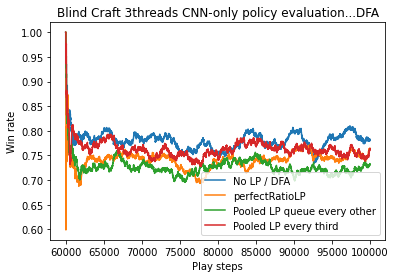

In [15]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA,ax=axs, ci=99,
 #            )
sns.lineplot(x="step", y="reward", data=df_no_lp_dfa,ax=axs, ci=99,
             )
sns.lineplot(x="step", y="reward", data=df_1w_lp_dfa,ax=axs, ci=99,
             )
sns.lineplot(x="step", y="reward", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="reward", data=eval_pooledThirds,ax=axs, ci=99,
             )
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', )
plt.title('Blind Craft 3threads CNN-only policy evaluation...DFA')

axs.legend(['No LP / DFA', 'perfectRatioLP', 'Pooled LP queue every other', 'Pooled LP every third'], loc=4)


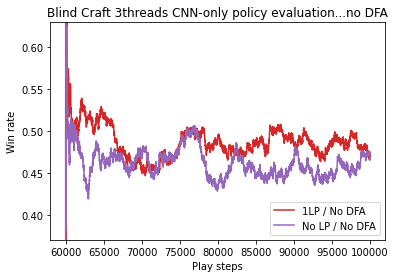

In [16]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99, color=col[3] )
sns.lineplot(x="step", y="reward", data=df_no_lp_no_dfa,ax=axs, ci=99, color=col[4] )


#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.37, 0.63))
plt.title('Blind Craft 3threads CNN-only policy evaluation...no DFA')

axs.legend(['1LP / No DFA', 'No LP / No DFA'], loc=4)


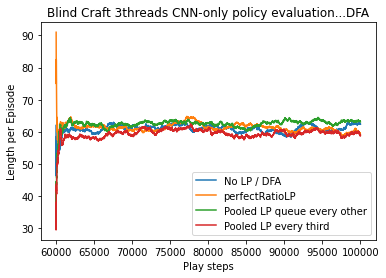

In [17]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="length", data=df_no_lp_dfa,ax=axs, ci=99,
             )
sns.lineplot(x="step", y="length", data=df_1w_lp_dfa,ax=axs, ci=99,
             )
sns.lineplot(x="step", y="length", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="length", data=eval_pooledThirds,ax=axs, ci=99,
             )
axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Blind Craft 3threads CNN-only policy evaluation...DFA')

axs.legend(['No LP / DFA', 'perfectRatioLP', 'Pooled LP queue every other', 'Pooled LP every third'], loc=4)

